In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
# mass_example = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]
# red_example = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["redshift"]

In [4]:
big = jsm_halopull.MassMat("../../../data/cross_host/meta_data_psi3/", save=True)

saving the accretion masses!


In [5]:
mass_mat_CROSS = np.load("../../../data/cross_host/meta_data_psi3/models.npz")["mass"]
red_mat_CROSS = np.load("../../../data/cross_host/meta_data_psi3/models.npz")["redshift"]

In [6]:
mass_mat = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]
red_mat = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["redshift"]

In [7]:
theta_fid = [10.5, 2.0, 0.2, 0, 0, 0]

In [8]:
lgMs_CROSS = jsm_SHMR.general(theta_fid, mass_mat_CROSS)

stats_CROSS = jsm_stats.SatStats(lgMs_CROSS[0], min_mass=6.5)

In [9]:
lgMs = jsm_SHMR.general(theta_fid, mass_mat)

stats = jsm_stats.SatStats(lgMs[0], min_mass=6.5)

In [10]:
stats_CROSS.CSMF()

In [11]:
stats.CSMF()

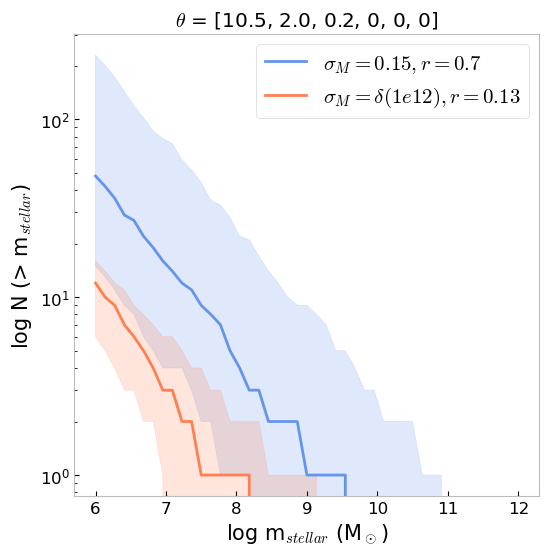

In [20]:
plt.figure(figsize=(6,6))
plt.title(f"$\\theta$ = {theta_fid}")
plt.plot(stats_CROSS.mass_bins, stats_CROSS.quant[1], label=f"$\\sigma_M = 0.15, r={stats_CROSS.r:.2}$", color="cornflowerblue")
plt.fill_between(stats_CROSS.mass_bins, y1=stats_CROSS.quant[0], y2=stats_CROSS.quant[2], alpha=0.2, color="cornflowerblue")

plt.plot(stats.mass_bins, stats.quant[1], label=f"$\\sigma_M = \\delta(1e12), r={stats.r:.2}$", color="coral")
plt.fill_between(stats.mass_bins, y1=stats.quant[0], y2=stats.quant[2], alpha=0.2, color="coral")

plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)
plt.show()


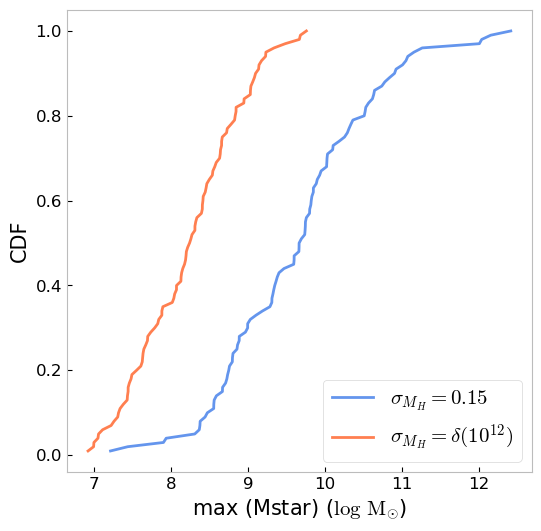

In [13]:
plt.figure(figsize=(6,6))
plt.plot(stats_CROSS.Msmax_sorted, stats_CROSS.ecdf_Msmax, color="cornflowerblue" , label="$\\sigma_{M_H} = 0.15$")
plt.plot(stats.Msmax_sorted, stats.ecdf_Msmax, color="coral", label="$\\sigma_{M_H} = \\delta(10^{12})$")
plt.xlabel("max (Mstar) ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.legend(fontsize=15)
plt.show()

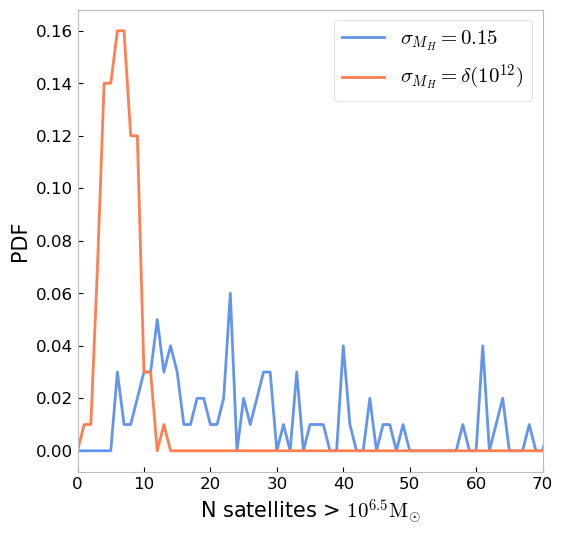

In [14]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(stats_CROSS.Pnsat.shape[0]), stats_CROSS.Pnsat, color="cornflowerblue" , label="$\\sigma_{M_H} = 0.15$")
plt.plot(np.arange(stats.Pnsat.shape[0]), stats.Pnsat, color="coral" , label="$\\sigma_{M_H} = \\delta(10^{12})$")
plt.xlabel("N satellites > $10^{"+str(stats_CROSS.min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(0,70)
plt.legend(fontsize=15)
plt.show()


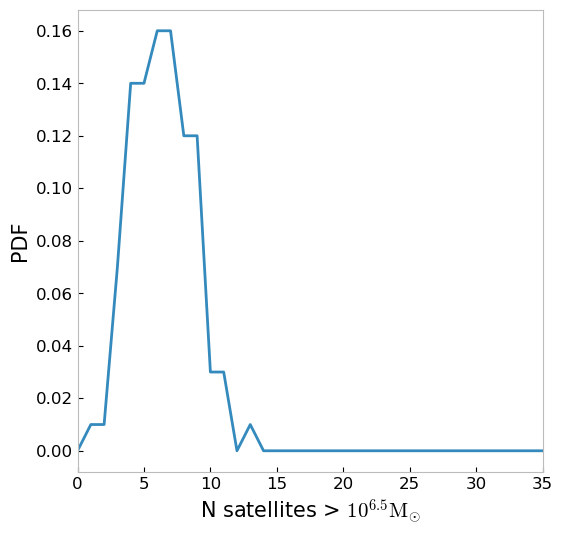

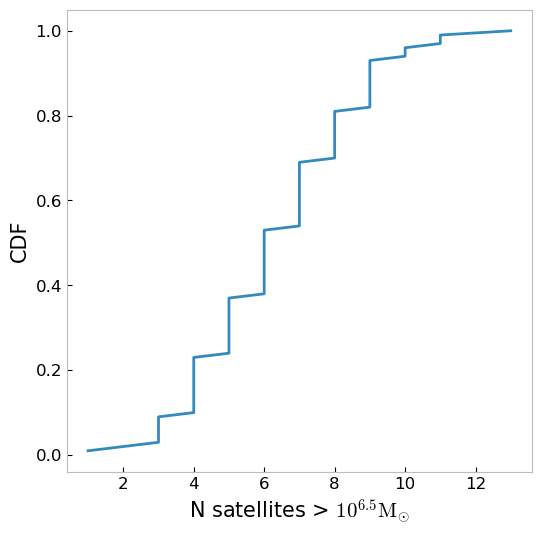

: 

In [31]:
stats.SATFREQ(plot=True)

### for Kaustav

In [7]:
KM = jsm_halopull.MassMat("/Users/jsmonzon/Research/data/MW-analog/meta_data_psi3/", save=True)
KM.write_to_FORTRAN()

writing out the subhalo data
